# AI 程序设计@NJU 
# 实验 6 可视化与数据探索
## 171860607
## 白晋斌

1.观察红酒数据(winequality-red.csv 文件)，数据中的 quality 是我们重点要关注的标 签 label，请使用 Seaborn 绘制 quality 特征与其他特征(皮尔逊相关系数的绝对值大于或 等于 0.2 的)的中位数之间的关系图，结果如下图所示。

                   quality
volatile acidity -0.390558
citric acid       0.226373
sulphates         0.251397
alcohol           0.476166


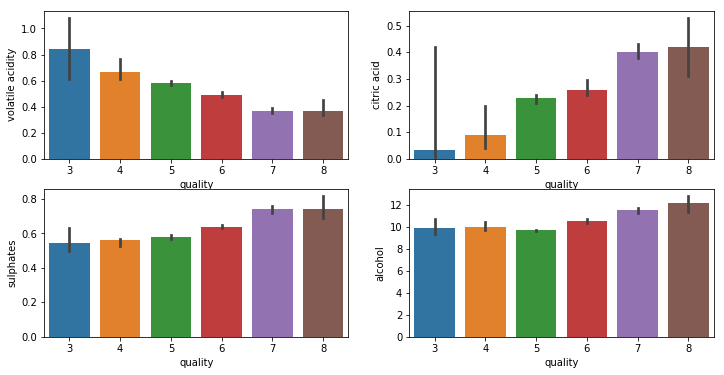

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from numpy import median

winedata=pd.read_csv('winequality-red.csv')
winecorr=winedata.corr()[['quality']]
winecorr=winecorr.iloc[:-1,:]
winecorr=winecorr[abs(winecorr.quality)>0.2]
print(winecorr)

plt.figure(figsize=(12,6))
for i in range(len(winecorr.index)):
    plt.subplot(2, 2, i+1)
    sns.barplot(x="quality", y=winecorr.index[i], data=winedata.loc[:,[winecorr.index[i],'quality']], estimator=median)

plt.show()


In [13]:
from sklearn import datasets

DM=datasets.load_diabetes()
#print('\033[34;0m（1）这里是第一问\033[0m')#汗😓本来想把编号做高亮彩色，但是好像jupyter不支持
print('（1）这里是第一问')
print('     先让我们看看DM(糖尿病)有哪些属性：')
print(DM.keys())
print('     一个个试一下吧！')
print("（1.1）第一个是糖尿病的数据，数据存储在.data属性:")
print(DM.data)
print('     数据有点多，让我们瞅瞅规格吧！')
print(DM.data.shape)
print('     看来数据都是以n维（n个特征）矩阵形式存放和展现，DM数据中共有442个实例，每个实例有10维特征')
print('（1.2）分别有些啥特征呢？如下所示')
print(DM.feature_names)
print('（1.3）如果是对于监督学习，比如分类问题，数据中会包含对应的分类结果，其存在.target成员中：')
print(DM.target)
print('     !!!!!!!!!!!!!!!')
print('（1.4）DESCR不明觉厉，试一试！原来是description的缩写')
print(DM.DESCR)
print('     似乎是总括性的东西，详细描述了数据集相关信息。很详细，这里不作赘述。')
print('（1.5）data_filename描述了数据集文件在本机的存放位置')
print(DM.data_filename)
print('（1.6）target_filename描述了分类结果文件在本机的存放位置')
print(DM.target_filename)
print('（1.7）分析完了，看来以后要获得关于数据集得相关描述，应该首先使用操作data.DESCR')

（1）这里是第一问
     先让我们看看DM(糖尿病)有哪些属性：
dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])
     一个个试一下吧！
（1.1）第一个是糖尿病的数据，数据存储在.data属性:
[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990842
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06832974
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286377
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04687948
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452837
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00421986
   0.00306441]]
     数据有点多，让我们瞅瞅规格吧！
(442, 10)
     看来数据都是以n维（n个特征）矩阵形式存放和展现，DM数据中共有442个实例，每个实例有10维特征
（1.2）分别有些啥特征呢？如下所示
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
（1.3）如果是对于监督学习，比如分类问题，数据中会包含对应的分类结果，其存在.target成员中：
[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 

（2）这里是第二问


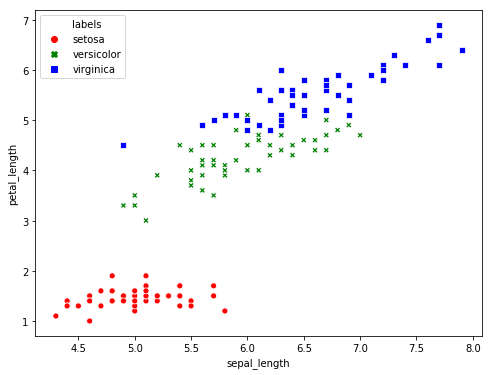

In [19]:
print('（2）这里是第二问')

from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
iris = datasets.load_iris()

sepal_length=[x[0] for x in iris.data]
petal_length=[x[2] for x in iris.data]
label=['setosa','versicolor','virginica']
labels=[label[x] for x in iris.target]
df=pd.DataFrame()
df['sepal_length']=sepal_length
df['petal_length']=petal_length
df['labels']=labels

colors=['r','g','b']
sizes=['.','P','d']
plt.figure(figsize=(8,6))
sns.scatterplot('sepal_length','petal_length',palette=colors,hue='labels',style='labels',data=df)

#plt.scatter(sepal_length, petal_length)
plt.show()


In [23]:
from pyecharts import Radar

radar=Radar(title='QQ三国游戏人物职业属性一览',subtitle='纪念我逝去的青春')
attr=[('武力',50),('智力',50),('灵活',50),('命中',50),('体质',50)]
jianshi=[[45,31,48,47,41]]
xianshu=[[27,49,51,45,31]]
yingyang=[[41,33,37,40,45]]
haojie=[[51,23,27,30,55]]
radar.set_radar_component(attr)
radar.add('剑侍',jianshi,area_color="#ADFF2F", area_opacity=0.3,legend_top='bottom')
radar.add('仙术',xianshu,area_color="#EE3A8C", area_opacity=0.3,legend_top='bottom')
radar.add('阴阳',yingyang,area_color="#00FA9A", area_opacity=0.3,legend_top='bottom')
radar.add('豪杰',haojie,area_color="#8B5A00", area_opacity=0.3,legend_top='bottom')
radar.show_config()
radar.render()


{
    "title": [
        {
            "text": "QQ\u4e09\u56fd\u6e38\u620f\u4eba\u7269\u804c\u4e1a\u5c5e\u6027\u4e00\u89c8",
            "subtext": "\u7eaa\u5ff5\u6211\u901d\u53bb\u7684\u9752\u6625",
            "left": "auto",
            "top": "auto",
            "textStyle": {
                "fontSize": 18
            },
            "subtextStyle": {
                "fontSize": 12
            }
        }
    ],
    "toolbox": {
        "show": true,
        "orient": "vertical",
        "left": "95%",
        "top": "center",
        "feature": {
            "saveAsImage": {
                "show": true,
                "title": "save as image"
            },
            "restore": {
                "show": true,
                "title": "restore"
            },
            "dataView": {
                "show": true,
                "title": "data view"
            }
        }
    },
    "series_id": 672435,
    "tooltip": {
        "trigger": "item",
        "triggerOn": "mousem

In [24]:
print('html详见文件夹下另一文件')

html详见文件夹下另一文件
